<a href="https://colab.research.google.com/github/abhishekkr8399/ML/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/flight.csv')
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<Axes: xlabel='stops', ylabel='count'>

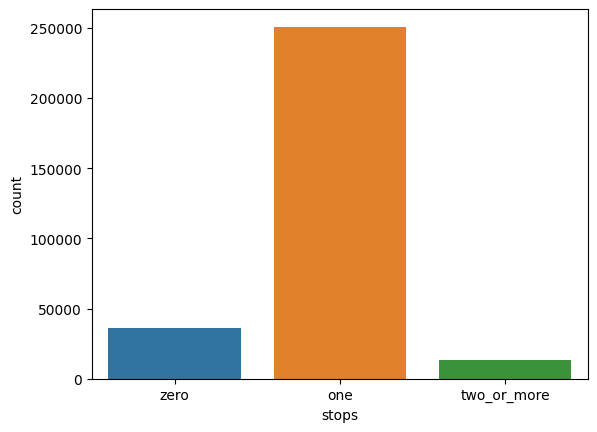

In [ ]:
sns.countplot(data=df,x="stops")

<Axes: xlabel='source_city', ylabel='count'>

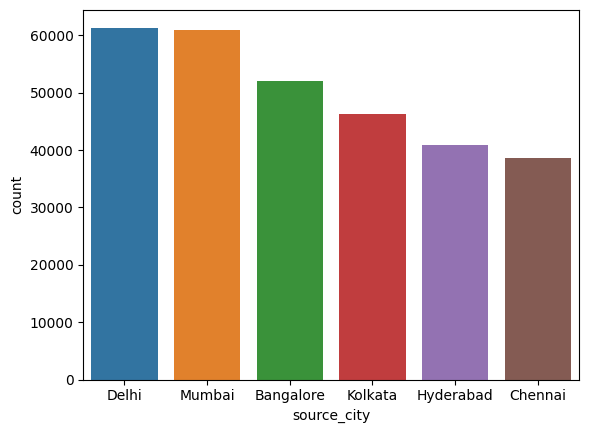

In [ ]:
sns.countplot(data=df,x="source_city")

<Axes: xlabel='destination_city', ylabel='count'>

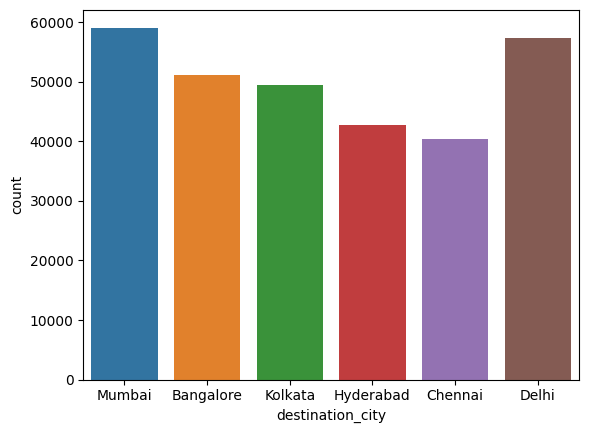

In [ ]:
sns.countplot(data=df,x="destination_city")

<Axes: xlabel='airline', ylabel='count'>

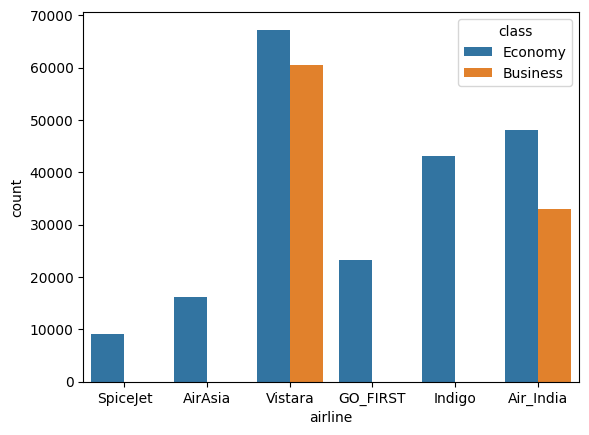

In [ ]:
sns.countplot(data=df,x="airline",hue='class')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
first_column = df.columns[0]
df = df.drop([first_column], axis=1)

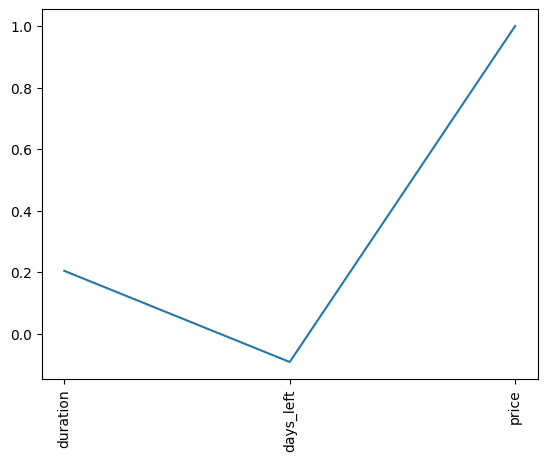

In [ ]:
corr=df[df.columns[0:]].corr()['price'][:]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['airline'] = labelencoder.fit_transform(df['airline'])
df['flight'] = labelencoder.fit_transform(df['flight'])
df['source_city'] = labelencoder.fit_transform(df['source_city'])
df['departure_time'] = labelencoder.fit_transform(df['departure_time'])
df['stops'] = labelencoder.fit_transform(df['stops'])
df['arrival_time'] = labelencoder.fit_transform(df['arrival_time'])
df['destination_city'] = labelencoder.fit_transform(df['destination_city'])
df['class'] = labelencoder.fit_transform(df['class'])

In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


<Axes: xlabel='price'>

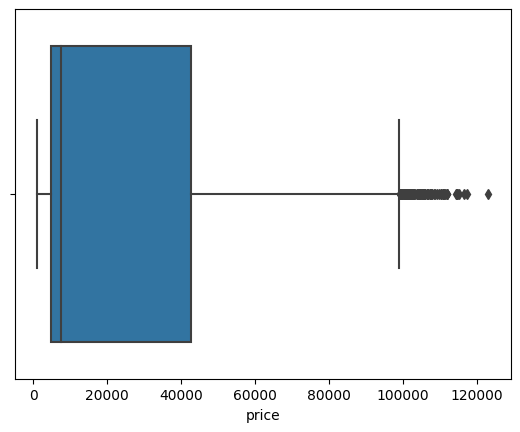

In [ ]:
sns.boxplot(x=df["price"])

<Axes: xlabel='flight'>

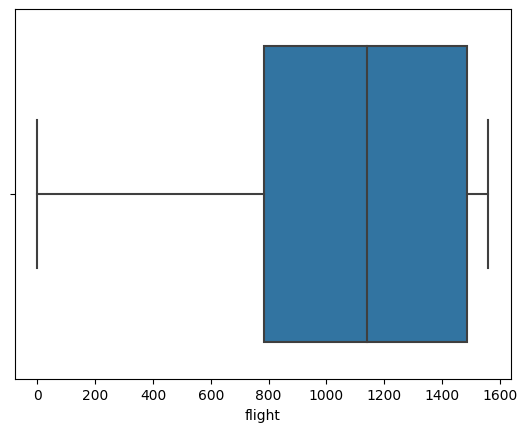

In [ ]:
sns.boxplot(x=df["flight"])

<Axes: xlabel='duration'>

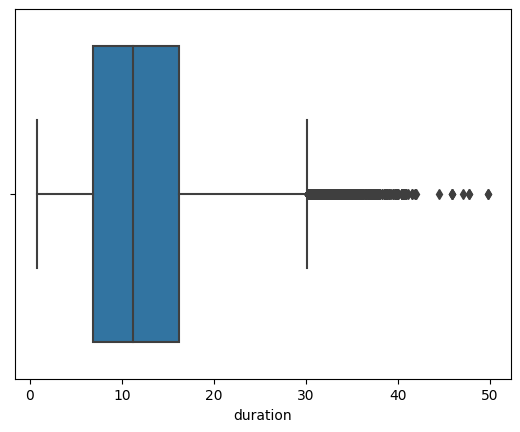

In [ ]:
sns.boxplot(x=df["duration"])

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean=df[(z<2.5).all(axis=1)]
data_clean.shape

(258231, 11)

<Axes: >

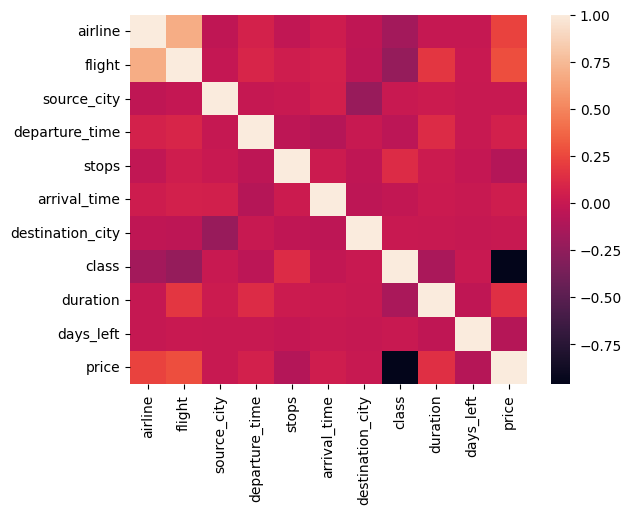

In [ ]:
sns.heatmap(data_clean.corr(),fmt='.2g')

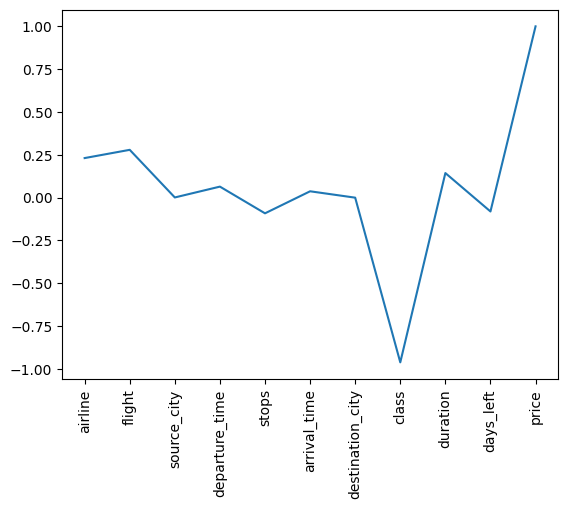

In [ ]:
corr=data_clean[data_clean.columns[0:]].corr()['price'][:]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X=data_clean.drop('price',axis=1)
y=data_clean['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state=0)
rfc.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y_predict=rfc.predict(X_test)
print("Random Forest \nAccuracy Score:",accuracy_score(y_test,Y_predict.round())*100,"%")
print("MEA :",mean_absolute_error(y_test, Y_predict))
print("MSE :",mean_squared_error(y_test, Y_predict))
print("R2 score :",r2_score(y_test, Y_predict))
MSE = np.square(np.subtract(y_test,Y_predict)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error :",RMSE)

Random Forest 
Accuracy Score: 25.819505489186206 %
MEA : 770.8689766043818
MSE : 3723283.841000577
R2 score : 0.9927971361262451
Root Mean Square Error : 1929.581260533118


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train,y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
Y_predict=ada.predict(X_test)
print("ADA Boost\nAccuracy Score:",accuracy_score(y_test,Y_predict.round())*100,"%")
print("MEA :",mean_absolute_error(y_test, Y_predict))
print("MSE :",mean_squared_error(y_test, Y_predict))
print("R2 score :",r2_score(y_test, Y_predict))
MSE = np.square(np.subtract(y_test,Y_predict)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error :",RMSE)

ADA Boost
Accuracy Score: 0.0038724417681569112 %
MEA : 3663.860608694756
MSE : 27943803.558949236
R2 score : 0.9459414265080661
Root Mean Square Error : 5286.189890549642


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
Y_predict=regressor.predict(X_test)
print("Decision Tree Regressor\nAccuracy Score:",accuracy_score(y_test,Y_predict.round())*100,"%")
print("MEA :",mean_absolute_error(y_test, Y_predict))
print("MSE :",mean_squared_error(y_test, Y_predict))
print("R2 score :",r2_score(y_test, Y_predict))
MSE = np.square(np.subtract(y_test,Y_predict)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error :",RMSE)

Decision Tree Regressor
Accuracy Score: 71.22388522082599 %
MEA : 770.2808940177227
MSE : 5899280.16549848
R2 score : 0.9885875711334946
Root Mean Square Error : 2428.8433801911724
